## **Thesis Code**

**Load datasets**

In [11]:
import pandas as pd

train_set = pd.read_csv(r"/content/train_set_oversampled.csv")
test_set = pd.read_csv(r"/content/test_set.csv")
pd.set_option("display.max_columns", 100)
print(test_set.head(10))



   Unnamed: 0   WEEKDAY  SEASON  TIME_OF_DAY        LOCATION_TYPE  \
0           4  Saturday  autumm  20:00-21:00            RESIDENCE   
1           7    Sunday  spring  20:00-21:00            RESIDENCE   
2           8  Thursday  summer  14:00-15:00          HOTEL/MOTEL   
3          13  Saturday  spring  23:00-24:00        VARIETY STORE   
4          22    Sunday  autumm  22:00-23:00               STREET   
5          26  Thursday  summer  00:00-01:00               STREET   
6          31    Friday  spring  18:00-19:00               STREET   
7          38  Saturday  winter  17:00-18:00            RESIDENCE   
8          42  Saturday  summer  03:00-04:00       BAR/NIGHT CLUB   
9          43    Monday  spring  06:00-07:00  PHOTO/VIDEO/TELECOM   

         BORO_NM                     CRIME_TYPE  
0       BROOKLYN            White Collar crimes  
1  STATEN ISLAND                Property crimes  
2         QUEENS                 Violent crimes  
3      MANHATTAN                Property

**RANDOM FOREST**

In [ ]:
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

random.seed(123)

X_train = train_set[['WEEKDAY', 'TIME_OF_DAY', 'SEASON', 'BORO_NM', 'LOCATION_TYPE']]
y_train = train_set['CRIME_TYPE']

X_test = test_set[['WEEKDAY', 'TIME_OF_DAY', 'SEASON', 'BORO_NM', 'LOCATION_TYPE']]
y_test = test_set['CRIME_TYPE']

# Convert categorical variables to numerical
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_encoded, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test_encoded)

# Evaluation metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

print("Random Forest Model Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-Score:", rf_f1)


Random Forest Model Metrics:
Accuracy: 0.3181490211169368
Precision: 0.3166077373389559
Recall: 0.3181490211169368
F1-Score: 0.31136608194593934


**RANDOM FOREST WITH HYPERPARAMETER TUNING**

In [ ]:
import random
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

random.seed(123)

X_train = train_set[['WEEKDAY', 'TIME_OF_DAY', 'SEASON', 'BORO_NM', 'LOCATION_TYPE']]
y_train = train_set['CRIME_TYPE']

X_test = test_set[['WEEKDAY', 'TIME_OF_DAY', 'SEASON', 'BORO_NM', 'LOCATION_TYPE']]
y_test = test_set['CRIME_TYPE']

# Convert categorical variables to numerical
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest classifier
rf_model = RandomForestClassifier()

# GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy')

grid_search.fit(X_train_encoded, y_train)

best_model_rf = grid_search.best_estimator_

# Predictions
rf_predictions = best_model_rf.predict(X_test_encoded)

# Evaluation matrix
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

print("Random Forest Model Metrics (with Grid Search):")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-Score:", rf_f1)

#running this took circa 2 hours

from sklearn.metrics import confusion_matrix

# Confusion matrix
cm_rf = confusion_matrix(y_test, rf_predictions)

print("Confusion Matrix:")
print(cm_rf)

Random Forest Model Metrics (with Grid Search):
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.31896676126797824
Precision: 0.3166196704530652
Recall: 0.31896676126797824
F1-Score: 0.31182437083755143
Confusion Matrix:
[[ 192    8  340  138  328  287   18  130]
 [  29    7  222  156   61  148    3   56]
 [ 189   41 3882  924  651  944   34  497]
 [  55   41 1218 1002  223  774   16  222]
 [  22    3   90   21  120   37    3   29]
 [ 181   37 1311  831  481 1053   21  341]
 [  41    3  138   45   71   90    7   48]
 [ 142   22 1001  436  401  546   13  368]]


*RF HYPERPARAMETER TUNED CONFUSION MATRIX*

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

crime_labels_rf = sorted(y_test.unique())

# Confusion matrix
cm_rf = confusion_matrix(y_test, rf_predictions)

cm_rf_df = pd.DataFrame(cm_rf, index=crime_labels_rf, columns=crime_labels_rf)

print("Confusion Matrix:")
print(cm_rf_df)


Confusion Matrix:
                               Drug & Alcohol related crimes  \
Drug & Alcohol related crimes                            192   
Miscellaneous crimes                                      29   
Property crimes                                          189   
Public Order crimes                                       55   
Traffic Violations                                        22   
Violent crimes                                           181   
Weapon-related crimes                                     41   
White Collar crimes                                      142   

                               Miscellaneous crimes  Property crimes  \
Drug & Alcohol related crimes                     8              340   
Miscellaneous crimes                              7              222   
Property crimes                                  41             3882   
Public Order crimes                              41             1218   
Traffic Violations                           

**RF Feature Importance**

Feature Importance:
                                       Feature  Importance
86                        LOCATION_TYPE_STREET    0.059884
81                     LOCATION_TYPE_RESIDENCE    0.045990
31                               SEASON_autumm    0.038541
32                               SEASON_spring    0.036268
34                               SEASON_winter    0.036068
33                               SEASON_summer    0.036012
0                               WEEKDAY_Friday    0.032093
5                              WEEKDAY_Tuesday    0.031142
6                            WEEKDAY_Wednesday    0.031001
4                             WEEKDAY_Thursday    0.030599
2                             WEEKDAY_Saturday    0.029016
1                               WEEKDAY_Monday    0.028155
41              LOCATION_TYPE_AIRPORT TERMINAL    0.028031
3                               WEEKDAY_Sunday    0.025597
55              LOCATION_TYPE_DEPARTMENT STORE    0.019961
36                            BORO_N

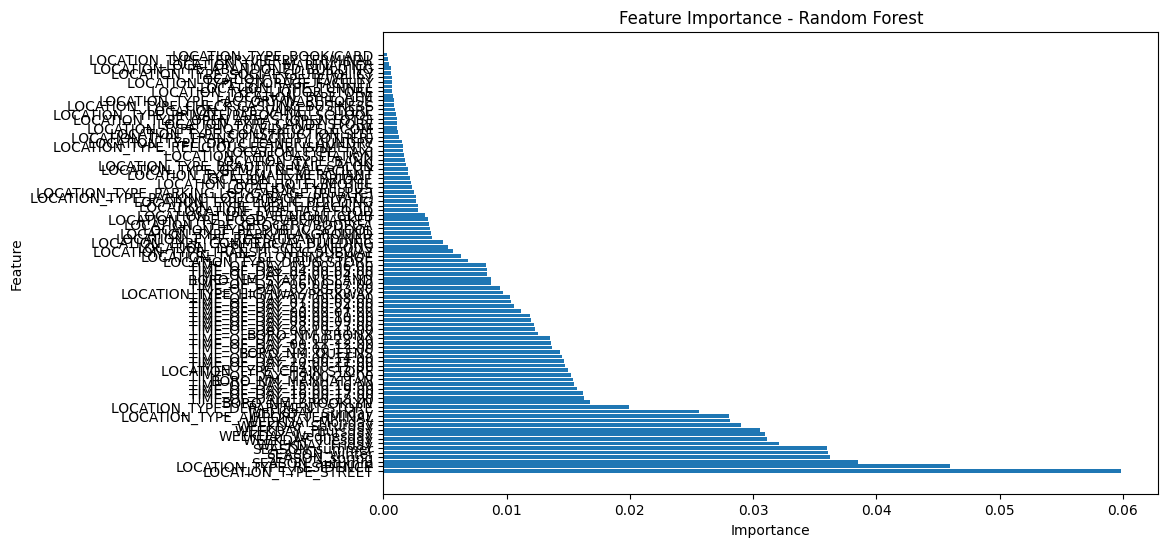

In [ ]:
#Feature importance
feature_importance = best_model_rf.feature_importances_

#Dataframe
feature_importance_df_rf = pd.DataFrame({'Feature': X_train_encoded.columns, 'Importance': feature_importance})

#Sort
feature_importance_df_rf = feature_importance_df_rf.sort_values('Importance', ascending=False)

pd.set_option('display.max_rows', None)

print("Feature Importance:")
print(feature_importance_df_rf)


import matplotlib.pyplot as plt

#Visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_rf['Feature'], feature_importance_df_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.show()



Aggregated Feature Importance:
          Importance
TIME        0.298005
LOCATION    0.279788
WEEKDAY     0.207603
SEASON      0.146890
BORO        0.067714


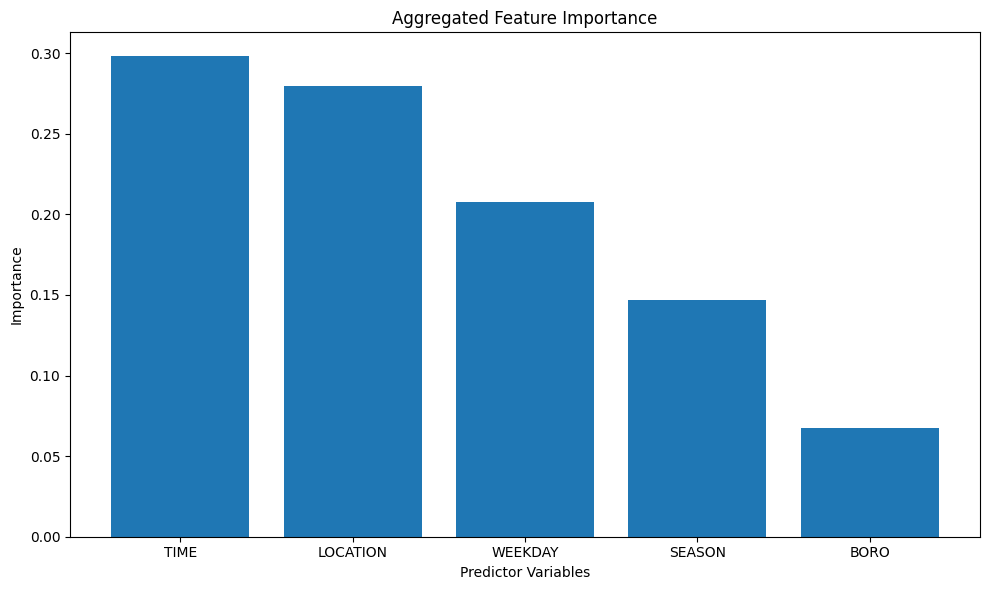

In [ ]:
# Aggregate feature importances
aggregated_importance = {}

for index, row in feature_importance_df_rf.iterrows():
    feature_name = row['Feature']
    importance = row['Importance']

    original_feature_name = feature_name.split('_')[0]

    if original_feature_name in aggregated_importance:
        aggregated_importance[original_feature_name] += importance
    else:
        aggregated_importance[original_feature_name] = importance

# Convert to dataframe
aggregated_importance_df = pd.DataFrame.from_dict(aggregated_importance, orient='index', columns=['Importance'])

aggregated_importance_df = aggregated_importance_df.sort_values('Importance', ascending=False)

print("Aggregated Feature Importance:")
print(aggregated_importance_df)

import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.bar(aggregated_importance_df.index, aggregated_importance_df['Importance'])
plt.xticks(rotation='horizontal')
plt.xlabel('Predictor Variables')
plt.ylabel('Importance')
plt.title('Aggregated Feature Importance')
plt.tight_layout()
plt.show()



**XGBOOST**

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

random.seed(123)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train_encoded, y_train_encoded)

# Predictions
xgb_predictions_encoded = xgb_model.predict(X_test_encoded)

xgb_predictions = label_encoder.inverse_transform(xgb_predictions_encoded)

# Evaluation
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions, average='weighted')
xgb_recall = recall_score(y_test, xgb_predictions, average='weighted')
xgb_f1 = f1_score(y_test, xgb_predictions, average='weighted')

print("\nXGBoost Model Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1-Score:", xgb_f1)



XGBoost Model Metrics:
Accuracy: 0.32627832026552506
Precision: 0.38312288915662135
Recall: 0.32627832026552506
F1-Score: 0.3246887288091437


**XGBOOST WITH HYPERPARAMETER TUNING**

In [ ]:
import random
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

random.seed(123)

X_train = train_set[['WEEKDAY', 'TIME_OF_DAY', 'SEASON', 'BORO_NM', 'LOCATION_TYPE']]
y_train = train_set['CRIME_TYPE']

X_test = test_set[['WEEKDAY', 'TIME_OF_DAY', 'SEASON', 'BORO_NM', 'LOCATION_TYPE']]
y_test = test_set['CRIME_TYPE']

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Convert categorical to numerical
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0, 1, 5]
}

# XGBoost classifier
xgb_model = XGBClassifier()

# GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv = 3)

grid_search.fit(X_train_encoded, y_train_encoded)

best_model_xgb = grid_search.best_estimator_

# Predictions
xgb_predictions_encoded = best_model_xgb.predict(X_test_encoded)

xgb_predictions = label_encoder.inverse_transform(xgb_predictions_encoded)

# Evaluation metrics
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions, average='weighted')
xgb_recall = recall_score(y_test, xgb_predictions, average='weighted')
xgb_f1 = f1_score(y_test, xgb_predictions, average='weighted')

print("XGBoost Model Metrics (with Grid Search):")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1-Score:", xgb_f1)

#running this took circa 5.5 hours

from sklearn.metrics import confusion_matrix
import pandas as pd

crime_labels_xgb = sorted(y_test.unique())

# Confusion matrix
cm_xgb = confusion_matrix(y_test, xgb_predictions)

# Create DataFrame
cm_xgb_df = pd.DataFrame(cm_xgb, index=crime_labels_xgb, columns=crime_labels_xgb)

print("Confusion Matrix:")
print(cm_xgb_df)


XGBoost Model Metrics (with Grid Search):
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.33156958006638126
Precision: 0.3961709373701572
Recall: 0.33156958006638126
F1-Score: 0.328048421477376
Confusion Matrix:
                               Drug & Alcohol related crimes  \
Drug & Alcohol related crimes                            125   
Miscellaneous crimes                                       9   
Property crimes                                           71   
Public Order crimes                                       14   
Traffic Violations                                         8   
Violent crimes                                            71   
Weapon-related crimes                                     23   
White Collar crimes                                       60   

                               Miscellaneous crimes  Property crimes  \
Drug & Alcohol related crimes              

**XGBoost Feature Importance**

Feature Importance:
                             Feature  Importance
41    LOCATION_TYPE_AIRPORT TERMINAL    0.133486
55    LOCATION_TYPE_DEPARTMENT STORE    0.102175
86              LOCATION_TYPE_STREET    0.083247
81           LOCATION_TYPE_RESIDENCE    0.056432
50         LOCATION_TYPE_CHAIN STORE    0.047591
..                               ...         ...
36                  BORO_NM_BROOKLYN    0.002640
31                     SEASON_autumm    0.002562
4                   WEEKDAY_Thursday    0.002492
84  LOCATION_TYPE_SOCIAL CLUB/POLICY    0.002382
70         LOCATION_TYPE_MARINA/PIER    0.002273

[92 rows x 2 columns]


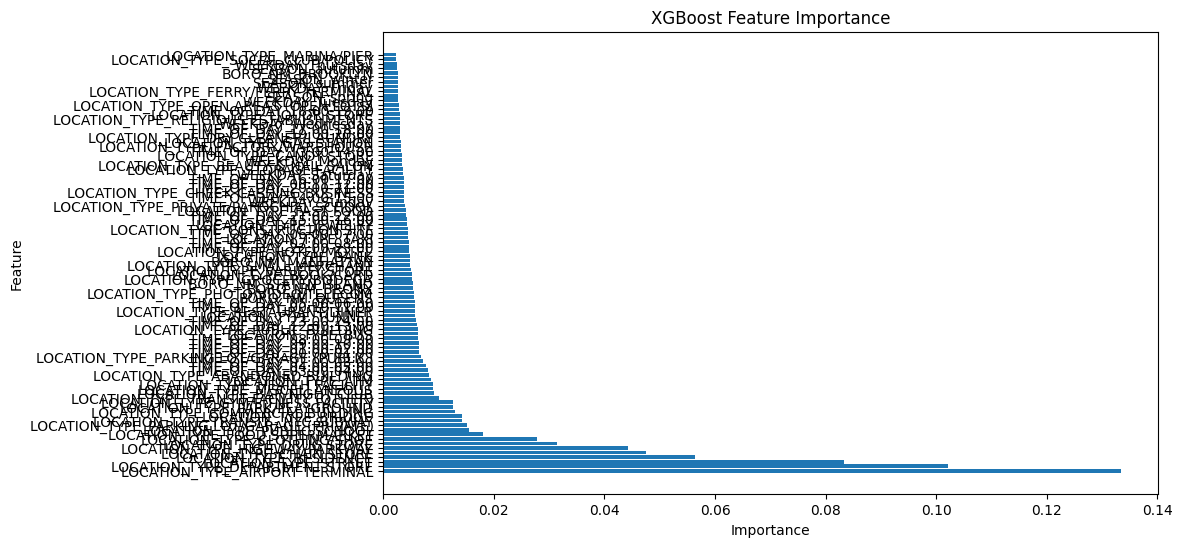

In [ ]:
import matplotlib.pyplot as plt
# Calculate feature importance
feature_importance = best_model_xgb.feature_importances_

# Create dataframe
feature_importance_df_xgb = pd.DataFrame({'Feature': X_train_encoded.columns, 'Importance': feature_importance})

# Sort
feature_importance_df_xgb = feature_importance_df_xgb.sort_values('Importance', ascending=False)

# Print the feature importance dataframe
print("Feature Importance:")
print(feature_importance_df_xgb)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_xgb['Feature'], feature_importance_df_xgb['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance")
plt.show()

Aggregated Feature Importance:
          Importance
LOCATION    0.822614
TIME        0.121264
BORO        0.023819
WEEKDAY     0.021661
SEASON      0.010642


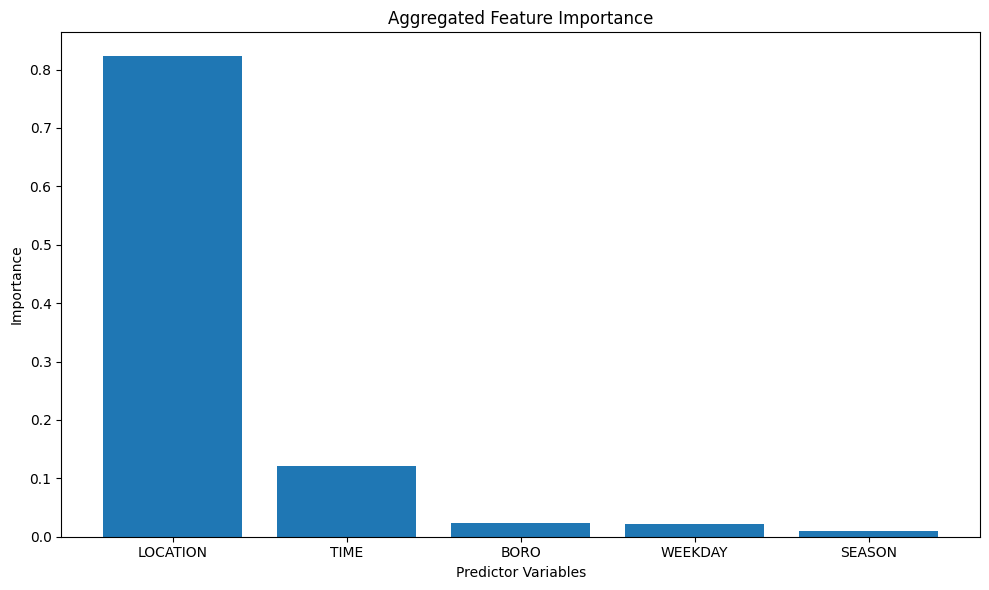

In [ ]:
# Aggregate back
aggregated_importance = {}

for index, row in feature_importance_df_xgb.iterrows():
    feature_name = row['Feature']
    importance = row['Importance']

    original_feature_name = feature_name.split('_')[0]

    if original_feature_name in aggregated_importance:
        aggregated_importance[original_feature_name] += importance
    else:
        aggregated_importance[original_feature_name] = importance

# Make dataframe
aggregated_importance_df = pd.DataFrame.from_dict(aggregated_importance, orient='index', columns=['Importance'])

# Sort
aggregated_importance_df = aggregated_importance_df.sort_values('Importance', ascending=False)

print("Aggregated Feature Importance:")
print(aggregated_importance_df)

import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.bar(aggregated_importance_df.index, aggregated_importance_df['Importance'])
plt.xticks(rotation='horizontal')
plt.xlabel('Predictor Variables')
plt.ylabel('Importance')
plt.title('Aggregated Feature Importance')
plt.tight_layout()
plt.show()



**MULTILAYER PERCEPTRON**

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import random

random.seed(123)

X_train = train_set[['WEEKDAY', 'TIME_OF_DAY', 'SEASON', 'BORO_NM', 'LOCATION_TYPE']]
y_train = train_set['CRIME_TYPE']

X_test = test_set[['WEEKDAY', 'TIME_OF_DAY', 'SEASON', 'BORO_NM', 'LOCATION_TYPE']]
y_test = test_set['CRIME_TYPE']

# Convert categorical to numerical
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Multilayer Perceptron model
mlp_model = MLPClassifier()
mlp_model.fit(X_train_encoded, y_train)

# Predictions
mlp_predictions = mlp_model.predict(X_test_encoded)

# Evaluation metrics
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
mlp_precision = precision_score(y_test, mlp_predictions, average='weighted')
mlp_recall = recall_score(y_test, mlp_predictions, average='weighted')
mlp_f1 = f1_score(y_test, mlp_predictions, average='weighted')

print("\nMultilayer Perceptron Model Metrics:")
print("Accuracy:", mlp_accuracy)
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)
print("F1-Score:", mlp_f1)


from sklearn.metrics import confusion_matrix
import pandas as pd

crime_labels_mlp = sorted(y_test.unique())

# Confusion matrix
cm_mlp = confusion_matrix(y_test, mlp_predictions)

cm_mlp_df = pd.DataFrame(cm_mlp, index=crime_labels_mlp, columns=crime_labels_mlp)

print("Confusion Matrix:")
print(cm_mlp_df)


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Multilayer Perceptron Model Metrics:
Accuracy: 0.35215739092789455
Precision: 0.36097606504625085
Recall: 0.35215739092789455
F1-Score: 0.337480694638662
Confusion Matrix:
                               Drug & Alcohol related crimes  \
Drug & Alcohol related crimes                            241   
Miscellaneous crimes                                      24   
Property crimes                                          145   
Public Order crimes                                       39   
Traffic Violations                                        20   
Violent crimes                                           160   
Weapon-related crimes                                     49   
White Collar crimes                                      110   

                               Miscellaneous crimes  Property crimes  \
Drug & Alcohol related crimes                     0              393   
Miscellaneous crimes                              2              244   
Property crimes                   

**MLP Feature Importance (SHAP)**

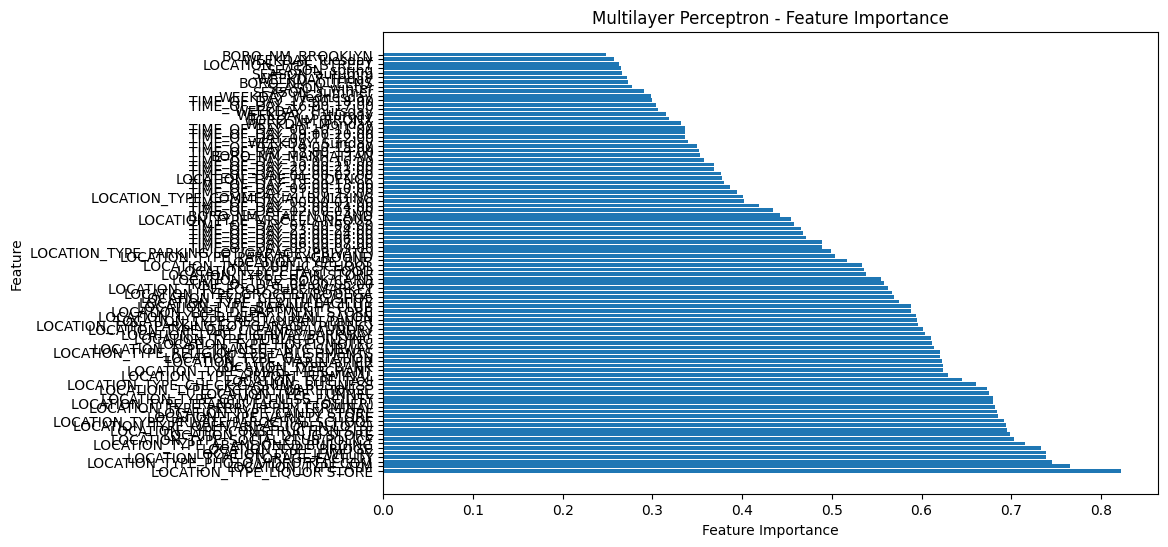

In [15]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

# Calculate Feature
importance_mask = np.abs(mlp_model.coefs_[0].T).mean(axis=0)  # Average absolute weight for input layer

feature_names = X_train_encoded.columns

selected_features = feature_names[importance_mask > 0]
feature_importances = importance_mask[importance_mask > 0]

# Sort
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = selected_features[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Multilayer Perceptron - Feature Importance')
plt.show()


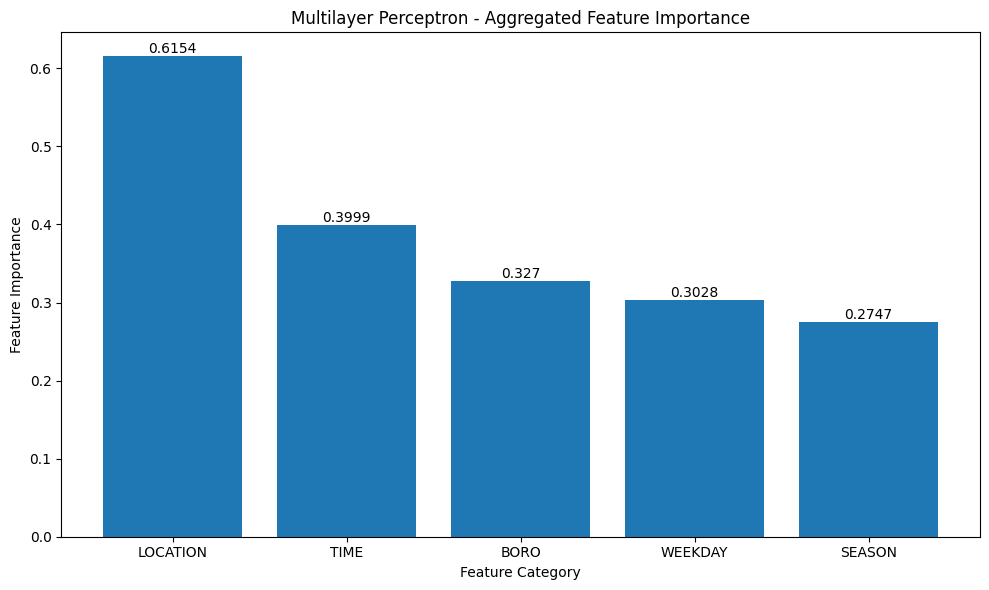

In [26]:
importance_mask = np.abs(mlp_model.coefs_[0].T).mean(axis=0)  # Average absolute weight for input layer

feature_names = X_train_encoded.columns

selected_features = feature_names[importance_mask > 0]
feature_importances = importance_mask[importance_mask > 0]

# Sort feature importances
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = selected_features[sorted_indices]

category_columns = list(set([feature.split('_')[0] for feature in feature_names]))

# Aggregate importances per feature

aggregated_importance = {}

for category in category_columns:
    category_importances = [importance_mask[i] for i, feature_name in enumerate(feature_names) if feature_name.startswith(category)]
    aggregated_importance[category] = np.mean(category_importances)

# Sort
sorted_aggregated_importance = dict(sorted(aggregated_importance.items(), key=lambda x: x[1], reverse=True))

sorted_categories = list(sorted_aggregated_importance.keys())
sorted_importances = list(sorted_aggregated_importance.values())

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align='center')
plt.xticks(range(len(sorted_importances)), sorted_categories, rotation='horizontal')
plt.ylabel('Feature Importance')
plt.xlabel('Feature Category')
plt.title('Multilayer Perceptron - Aggregated Feature Importance')

for i, v in enumerate(sorted_importances):
    plt.text(i, v, str(round(v, 4)), ha='center', va='bottom')

plt.tight_layout()
plt.show()


**MULTILAYER PERCEPTRON WITH HYPERPARAMETER TUNING: FAILED**

In [3]:
import random
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

random.seed(123)

X_train = train_set[['WEEKDAY', 'TIME_OF_DAY', 'SEASON', 'BORO_NM', 'LOCATION_TYPE']]
y_train = train_set['CRIME_TYPE']

X_test = test_set[['WEEKDAY', 'TIME_OF_DAY', 'SEASON', 'BORO_NM', 'LOCATION_TYPE']]
y_test = test_set['CRIME_TYPE']

# Convert categorical to numerical
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Parameter grid
param_grid = {
    'hidden_layer_sizes': [(100, 100), (50, 50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [500, 1000, 2000],
}

# MLP classifier
mlp_model = MLPClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, scoring='accuracy', cv=3)

grid_search.fit(X_train_scaled, y_train)

best_model_mlp = grid_search.best_estimator_

# Prediction
mlp_predictions = best_model_mlp.predict(X_test_scaled)

# Evaluation metrics
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
mlp_precision = precision_score(y_test, mlp_predictions, average='weighted')
mlp_recall = recall_score(y_test, mlp_predictions, average='weighted')
mlp_f1 = f1_score(y_test, mlp_predictions, average='weighted')

print("Multilayer Perceptron Model Metrics (with Grid Search):")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", mlp_accuracy)
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)
print("F1-Score:", mlp_f1)


from sklearn.metrics import confusion_matrix
import pandas as pd

crime_labels_mlp = sorted(y_test.unique())

# Confusion matrix
cm_mlp = confusion_matrix(y_test, mlp_predictions)
cm_mlp_df = pd.DataFrame(cm_mlp, index=crime_labels_mlp, columns=crime_labels_mlp)

print("Confusion Matrix:")
print(cm_mlp_df)

#after 6 hours and 50 minutes it stopped running.
#Due to computational limitations we will continue working with MLP without
#hyperparameter tuning



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: ignored